In [66]:
import numpy as np
import pandas as pd
from scipy.stats import t
from scipy.stats import f
from scipy import stats


In [78]:
columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",  "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df = pd.read_csv('datasets/wine.data', names = columns)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [80]:
#class for a regression model for a pandas dataframe for more than two independent variables and one dependent variable

class RegressionModel:
    def __init__(self, df, dependent_variable, independent_variables):
        self.df = df
        self.dependent_variable = dependent_variable
        self.independent_variables = independent_variables
        self.coefficients = self.get_coefficients()
        self.intercept = self.get_intercept()
        self.predicted = self.get_predicted()
        self.residuals = self.get_residuals()
        self.r_squared = self.get_r_squared()
        self.f_statistic = self.get_f_statistic()
        self.f_p_value = self.get_f_p_value()
        self.t_statistics = self.get_t_statistics()
        self.t_p_values = self.get_t_p_values()
        self.summary = self.get_summary()
        
    def get_coefficients(self):
        return np.linalg.inv(self.df[self.independent_variables].T.dot(self.df[self.independent_variables])).dot(self.df[self.independent_variables].T).dot(self.df[self.dependent_variable])
    def get_intercept(self):
        return np.mean(self.df[self.dependent_variable]) - np.mean(self.df[self.independent_variables].dot(self.coefficients))
    
    def get_predicted(self):
        return self.df[self.independent_variables].dot(self.coefficients) + self.intercept
    
    def get_residuals(self):
        return self.df[self.dependent_variable] - self.predicted
    
    def get_r_squared(self):
        return 1 - (np.sum(self.residuals ** 2) / np.sum((self.df[self.dependent_variable] - np.mean(self.df[self.dependent_variable])) ** 2))
    
    def get_f_statistic(self):
        return (self.r_squared / (len(self.independent_variables) - 1)) / ((1 - self.r_squared) / (len(self.df) - len(self.independent_variables)))
    
    def get_f_p_value(self):
        return 1 - stats.f.cdf(self.f_statistic, len(self.independent_variables) - 1, len(self.df) - len(self.independent_variables))
    
    def get_t_statistics(self):
        return self.coefficients / np.sqrt(np.diag(np.linalg.inv(self.df[self.independent_variables].T.dot(self.df[self.independent_variables]))))
    
    def get_t_p_values(self):
        return 2 * (1 - stats.t.cdf(np.abs(self.t_statistics), len(self.df) - len(self.independent_variables)))
    
    def get_summary(self):
        summary = pd.DataFrame
        return summary


In [79]:
#create a regression model for the wine dataset
wine_model = RegressionModel(df, "Alcohol", ["Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",  "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])

<class 'pandas.core.frame.DataFrame'>


In [93]:
wine_model.get_coefficients()


12

In [82]:
wine_model.get_intercept()

0.05026498289710979

In [90]:
wine_model.get_predicted()

pandas.core.series.Series

In [100]:
validacion = pd.DataFrame({'Actual': df['Alcohol'].values, 'Predicted': wine_model.get_predicted() , 'Diferencia': df['Alcohol'] - wine_model.get_predicted(), 'Residuals': wine_model.get_residuals() })
l = validacion.head(25)
l


,Actual,Predicted,Diferencia,Residuals
0,14.23,14.664617,-0.434617,-0.434617
1,13.20,12.936429,0.263571,0.263571
2,13.16,13.776985,-0.616985,-0.616985
3,14.37,14.736803,-0.366803,-0.366803
4,13.24,14.067924,-0.827924,-0.827924
5,14.20,14.130466,0.069534,0.069534
6,14.39,13.757229,0.632771,0.632771
7,14.06,14.876303,-0.816303,-0.816303
8,14.83,12.728825,2.101175,2.101175
9,13.86,13.837958,0.022042,0.022042


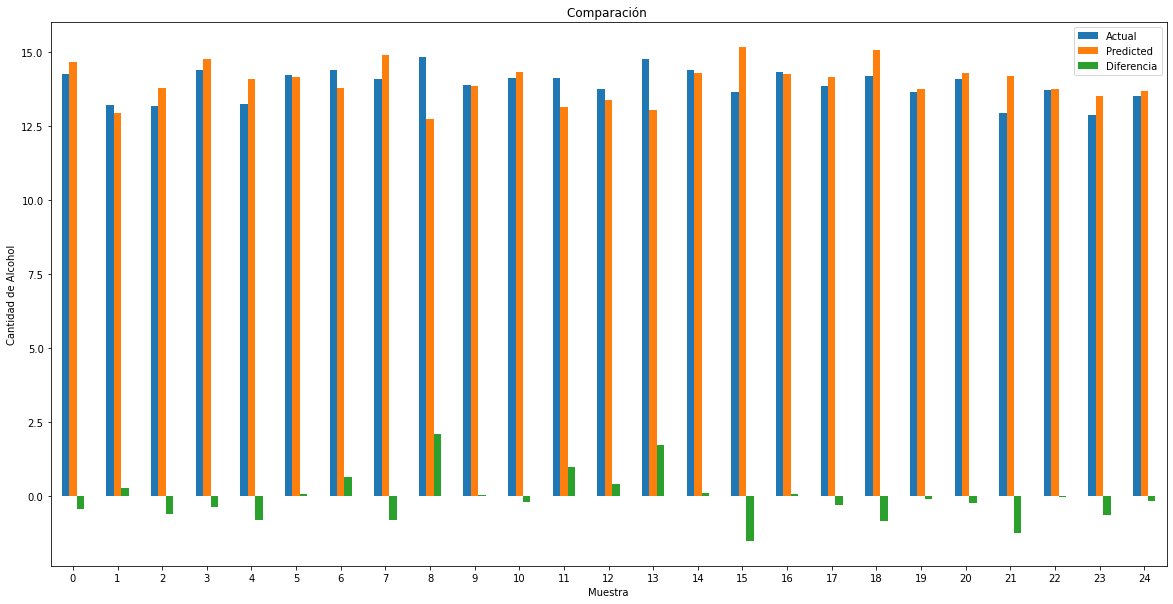

In [98]:
import matplotlib.pyplot as plt  # importamos la librería que nos permitirá graficar

# creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción
l.plot.bar(rot=0, figsize=(20, 10))
# indicamos el título del gráfico
plt.title("Comparación ")
# indicamos la etiqueta del eje de las x
plt.xlabel("Muestra")
# indicamos la etiqueta del eje de las y, la cantidad de calorías
plt.ylabel("Cantidad de Alcohol")
plt.show()  # desplegamos el gráfico

In [85]:
wine_model.get_r_squared()

-0.251779579878866

In [86]:
wine_model.get_f_statistic()

-3.035344889766403

In [87]:
wine_model.get_f_p_value()

1.0

In [88]:
wine_model.get_t_statistics()

array([ 4.14193334,  1.45093196,  1.34031802,  4.28731049,  1.56385795,
       -2.30039255,  2.04345355, -0.63024407,  7.03892525,  5.67001997,
        4.83553717,  1.66289128])

In [89]:
wine_model.get_t_p_values()

array([5.47204971e-05, 1.48685869e-01, 1.81973537e-01, 3.05901436e-05,
       1.19755302e-01, 2.26704173e-02, 4.25882897e-02, 5.29401527e-01,
       4.86743978e-11, 6.19875209e-08, 3.00947602e-06, 9.82211492e-02])